# Non-Negative Matrix Factorization

#####  Non-Negative Matrix Factorization (NMF) is a supervised Machine Learning algorithm that can be used to factorize a matrix into two matrices of lower dimensions.

> ### Given a matrix V of $(m*n)$, where every element of V is positive, Non Negative Matrix is a factorization of V into two matrices W (of dimension $(m*k)$) and H (of dimension $(k*n)$).



#### Consider we have data matrix V of n rows and f columns $V (n,f)$, and all data points are positive and bounded. Then, NMF can be defined as approximation of V by decomposition of X of form $W*H$, where W is a matrix of size $(n,k)$ and H is a matrix of size $(k,f)$.

\begin{align*}
V &= W*H^\intercal \\
W &\in \mathbb{R}^{n \times k} \\
H &\in \mathbb{R}^{k \times f} \\
\end{align*}

- ##### Each Column of V can be calculated as follows:
\begin{align*}
V_i &= W*h_i \\
\end{align*}
- ##### We can think of this as columns in W as features of V which means coefficients in H are weights of features.
- ##### Thus data becomes linear combination of features and their weights. (i.e. $V_i = \sum_j W_ij h_j$)
<center><img src="./nmf.jpg" width=400px>
</center>

In [141]:
from warnings import filterwarnings
filterwarnings("ignore")

In [142]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import scipy.signal

In [143]:
# for progress bar
from tqdm import tqdm

In [144]:
plt.style.use('seaborn-whitegrid')

In [145]:
# np.set_printoptions(precision=1, suppress=True)

## Implementation

\begin{align*}
\mathbf{H}_{[i, j]}^{n+1} \leftarrow \mathbf{H}_{[i, j]}^{n} \frac{\left(\left(\mathbf{W}^{n}\right)^{T} \mathbf{V}\right)_{[i, j]}}{\left(\left(\mathbf{W}^{n}\right)^{T}\left[\mathbf{X}^{n} \mathbf{H}^{n}\right)_{[i, j]}\right.}
\end{align*}
\begin{align*}
\mathbf{W}_{[i, j]}^{n+1} \leftarrow \mathbf{W}_{[i, j]}^{n} \frac{\left(\mathbf{V}\left(\mathbf{H}^{n+1}\right)^{T}\right)_{[i, j]}}{\left(\mathbf{W}^{n} \mathbf{H}^{n+1}\left(\mathbf{H}^{n+1}\right)^{T}\right)_{[i, j]}}
\end{align*}

In [146]:
def update_H(W, H, V):
    numerator = W.T.dot(V)
    denominator = W.T.dot(W).dot(H) + 1e-10
    H = H * (numerator / denominator)
    return H


def update_W(W, H, V):
    numerator = V.dot(H.T)
    denominator = W.dot(H).dot(H.T) + 1e-10
    W = W * (numerator / denominator)
    return W

In [147]:
def NMF(V, rank=10, iter=500):

    # Initialize
    n, m = V.shape

    W = np.abs(np.random.randn(1, n, rank))[0]
    H = np.abs(np.random.randn(1, rank, m))[0]

    loss = []
    for i in tqdm(range(iter)):
        W = update_W(W, H, V)
        H = update_H(W, H, V)
        # loss.append(np.sum(np.abs(V - W.dot(H))))
        loss.append(sum((V - W.dot(H)).flatten()**2))  #l(V, HW) = ||V - WH||^2

    return H, W, loss

In [148]:
# display matrix with 1 precison
def display_matrix(M):
    for i in range(M.shape[0]):
        print('| ', end='')
        for j in range(M.shape[1]):
            print('{:.1f}'.format(M[i, j]), end=' | ')
        print('')
    print('')

##### Generating a Random Matrix of $8*8$

In [149]:
M = np.random.randint(1, 9, size=(8, 8))

#### Decompose the Matrix

In [150]:
H, W, loss = NMF(M, rank=4, iter=1000)

100%|██████████| 1000/1000 [00:00<00:00, 27792.68it/s]


In [151]:
print('Matrix M of shape:', M.shape)
display_matrix(M)
print('Matrix W of Shape', W.shape)
display_matrix(W)
print('Matrix H of shape',  H.shape)
display_matrix(H)

Matrix M of shape: (8, 8)
| 4.0 | 4.0 | 2.0 | 4.0 | 3.0 | 3.0 | 8.0 | 7.0 | 
| 3.0 | 1.0 | 2.0 | 1.0 | 4.0 | 3.0 | 2.0 | 2.0 | 
| 6.0 | 1.0 | 8.0 | 8.0 | 3.0 | 5.0 | 7.0 | 4.0 | 
| 2.0 | 2.0 | 6.0 | 6.0 | 7.0 | 5.0 | 5.0 | 3.0 | 
| 6.0 | 8.0 | 4.0 | 4.0 | 4.0 | 2.0 | 5.0 | 6.0 | 
| 6.0 | 6.0 | 5.0 | 1.0 | 6.0 | 5.0 | 7.0 | 3.0 | 
| 6.0 | 4.0 | 8.0 | 5.0 | 2.0 | 7.0 | 3.0 | 2.0 | 
| 2.0 | 4.0 | 2.0 | 2.0 | 7.0 | 1.0 | 7.0 | 2.0 | 

Matrix W of Shape (8, 4)
| 0.7 | 2.7 | 1.4 | 0.0 | 
| 0.9 | 0.0 | 0.5 | 0.8 | 
| 0.0 | 2.3 | 0.5 | 2.8 | 
| 1.4 | 1.0 | 0.0 | 2.3 | 
| 0.9 | 1.4 | 2.5 | 0.1 | 
| 1.9 | 0.0 | 2.0 | 1.0 | 
| 0.0 | 0.1 | 1.4 | 2.8 | 
| 2.2 | 0.8 | 0.7 | 0.1 | 

Matrix H of shape (4, 8)
| 0.0 | 0.9 | 0.2 | 0.0 | 3.1 | 0.4 | 2.1 | 0.3 | 
| 0.4 | 0.1 | 0.3 | 1.7 | 0.4 | 0.0 | 1.9 | 1.7 | 
| 2.2 | 2.5 | 1.1 | 0.2 | 0.0 | 1.0 | 0.7 | 1.3 | 
| 1.1 | 0.0 | 2.3 | 1.6 | 0.8 | 1.9 | 0.5 | 0.0 | 



In [152]:
M_ = np.dot(W, H)
print("Matrix M' of Shape:", M_.shape)
display_matrix(M_)

Matrix M' of Shape: (8, 8)
| 4.2 | 4.4 | 2.5 | 4.7 | 3.3 | 1.7 | 7.6 | 6.6 | 
| 2.1 | 2.0 | 2.7 | 1.4 | 3.4 | 2.4 | 2.7 | 1.0 | 
| 5.1 | 1.4 | 7.7 | 8.3 | 3.2 | 5.7 | 6.4 | 4.6 | 
| 3.0 | 1.3 | 6.0 | 5.3 | 6.5 | 4.8 | 6.1 | 2.3 | 
| 6.3 | 7.2 | 3.7 | 2.9 | 3.3 | 3.1 | 6.3 | 5.8 | 
| 5.6 | 6.7 | 5.0 | 2.0 | 6.6 | 4.6 | 5.9 | 3.2 | 
| 6.4 | 3.7 | 8.1 | 4.8 | 2.2 | 6.6 | 2.9 | 2.2 | 
| 1.9 | 3.6 | 1.7 | 1.6 | 7.2 | 1.7 | 6.6 | 2.9 | 



> #### This is a simple implementation of NMF algorithm.

## Applications

- Image Compression
- Recommendation Systems
- Document Clustering
- Dimensionality Reduction
- Data Compression and Approximation

### Image Compression

In [153]:
img = plt.imread('./img1.jpg')

V = img[:, :, 1]  # only use one color channel


# image details
print("Image shape:", img.shape)
print("Image size:", img.size)

Image shape: (399, 319, 3)
Image size: 381843


#####  Dimensions of Image
- Width $319px$
- Height $399px$

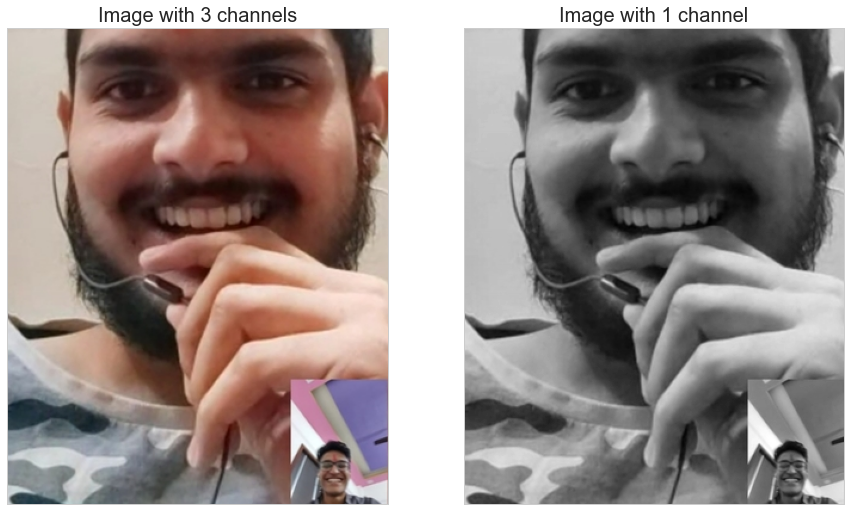

In [154]:
# Visualize the image
fig, ax = plt.subplots(1, 2, figsize=[15, 10])

ax[0].imshow(img)
ax[0].set_title('Image with 3 channels', fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].set_title('Image with 1 channel', fontsize=20)
ax[1].imshow(V, cmap='gray')
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()


#### $K = 100$

In [155]:
H, W, loss = NMF(V, rank=100, iter=500)

100%|██████████| 500/500 [00:08<00:00, 61.65it/s]


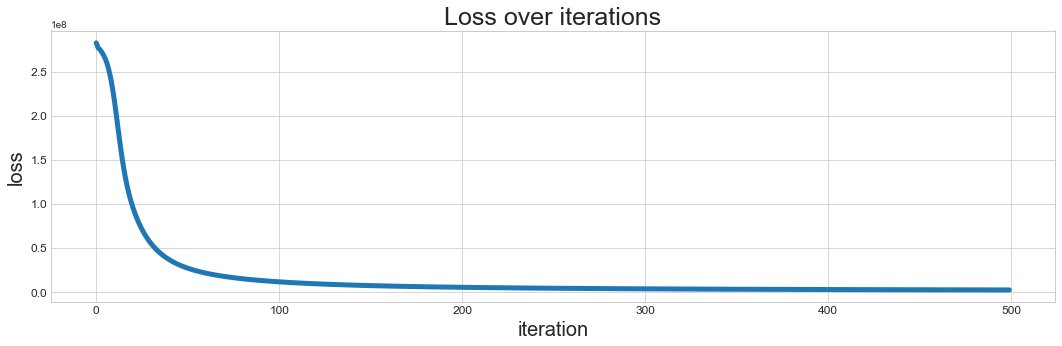

In [156]:
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

ax.plot(loss, lw=5)
ax.set_title('Loss over iterations', fontsize=25)
ax.tick_params(labelsize=12)
# ax.set_xlim(0, 500)
ax.set_xlabel('iteration', fontsize=20)
ax.set_ylabel('loss', fontsize=20)

plt.show()

In [157]:
I = np.dot(W, H)

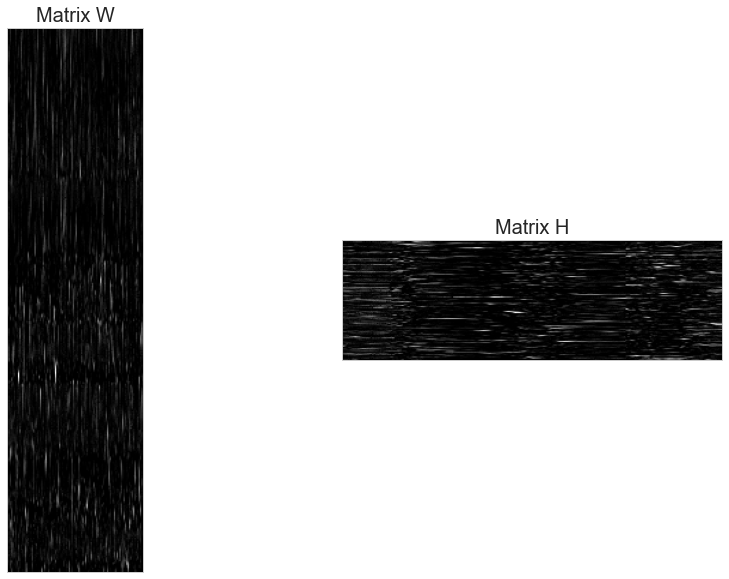

In [158]:
# plots of Decomposed Matrix
fig, ax = plt.subplots(1, 2, figsize=[15, 10])

ax[0].imshow(W, cmap='gray')
ax[0].set_title('Matrix W', fontsize=20)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(H, cmap='gray')
ax[1].set_title('Matrix H', fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()

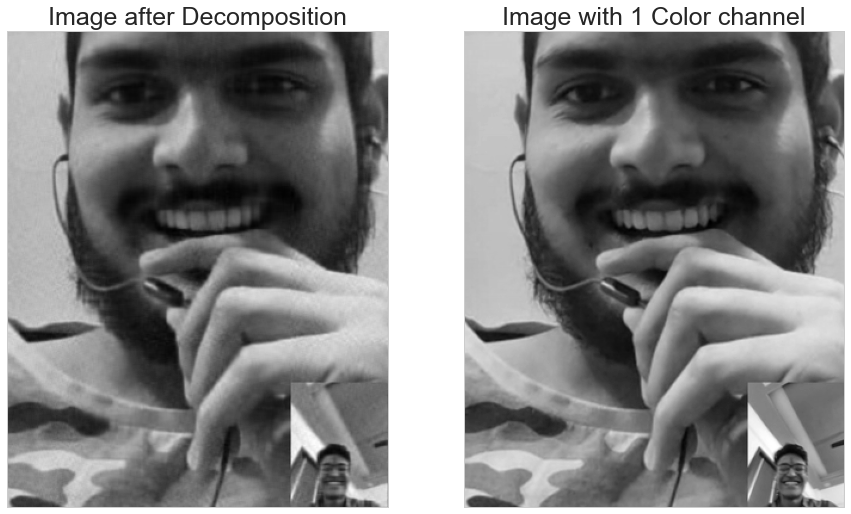

In [159]:
fig, ax = plt.subplots(1, 2, figsize=[15, 10])

ax[0].imshow(I, cmap='gray')
ax[0].set_title('Image after Decomposition', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].set_title('Image with 1 Color channel', fontsize=25)
ax[1].imshow(V, cmap='gray')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

In [160]:
# PSNR -> Peak Signal to Noise Ratio
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PNSR = 20 * np.log10(255 / np.sqrt(mse))
    return PNSR
    

In [161]:
# MSE -> Mean Squared Error
def MSE(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    return mse

In [162]:
# SSIM -> Structural Similarity Index
def SSIM(img1, img2):

    # 0.01*255^2
    C1 = (0.01 * 255) ** 2
    C2 = (0.03 * 255) ** 2
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)

    # 11x11 kernel
    kernel = np.ones((11, 11), np.float64)
    window = np.ones((11, 11), np.float64)

    mu1 = scipy.signal.convolve2d(img1, kernel, mode='valid') / np.sum(kernel) # mean of img1
    mu2 = scipy.signal.convolve2d(img2, kernel, mode='valid') / np.sum(kernel) # mean of img2

    mu1_sq = mu1 ** 2 # mean of img1^2
    mu2_sq = mu2 ** 2 # mean of img2^2
    mu1_mu2 = mu1 * mu2

    sigma1_sq = scipy.signal.convolve2d(img1 ** 2, window, mode='valid') / np.sum(window) - mu1_sq # variance of img1
    sigma2_sq = scipy.signal.convolve2d(img2 ** 2, window, mode='valid') / np.sum(window) - mu2_sq # variance of img2
    sigma12 = scipy.signal.convolve2d(img1 * img2, window, mode='valid') / np.sum(window) - mu1_mu2 # covariance of img1 and img2
    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2)) # SSIM
    return ssim_map.mean()

In [163]:
# image quality metrics
print("PSNR : {0:.2f}".format(PSNR(I, V)))
print("MSE : {0:.2f}".format(MSE(I, V)))
print("SSIM : {0:.2f}".format(SSIM(I, V)))


PSNR : 35.91
MSE : 16.66
SSIM : 0.96


## NMF with various K values

100%|██████████| 500/500 [00:09<00:00, 54.54it/s]


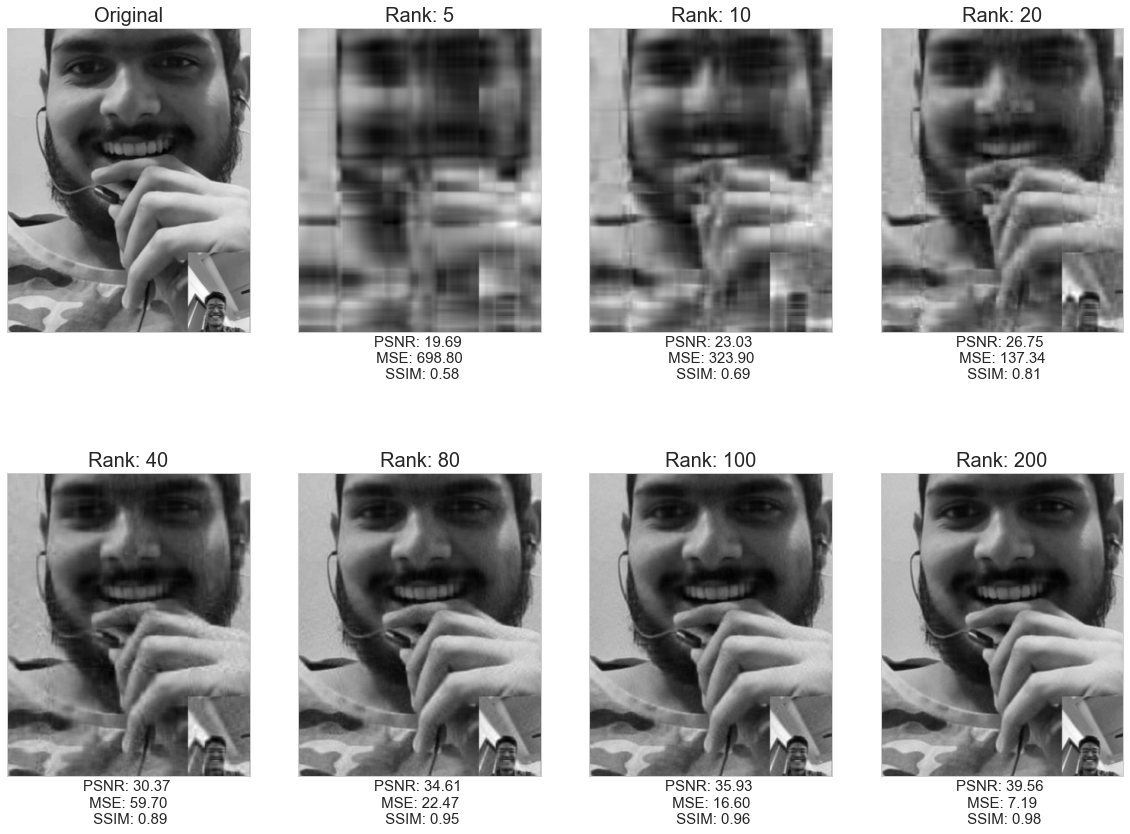

In [164]:
ranks_to_test = [5, 10, 20, 40, 80, 100, 200]

n_plots = len(ranks_to_test) + 1
fig, ax = plt.subplots(2, int(n_plots/2), figsize=[20, 15])

# Plot original image as reference
ax[0][0].imshow(V, cmap='gray')
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].set_title('Original', fontsize=20)


data_points_original = V.shape[0] * V.shape[1]

data_points = []

psnr = []
mse = []
ssim = []
n = 1
j = 0
for i in ranks_to_test:

    H, W, loss = NMF(V, rank=i, iter=500)

    # Reconstruct the image from W and H
    V_rec = W.dot(H)

    data_points.append((H.shape[0] * H.shape[1]) + (W.shape[0] * W.shape[1]))
    psnr.append(PSNR(V_rec, V))
    mse.append(MSE(V_rec, V))
    ssim.append(SSIM(V_rec, V))

    ax[j][n].imshow(V_rec, cmap='gray')
    ax[j][n].set_xticks([])
    ax[j][n].set_yticks([])
    ax[j][n].set_title('Rank: {}'.format(i), fontsize=20)
    ax[j][n].set_xlabel(
        'PSNR: {0:.2f} \n MSE: {1:.2f} \n SSIM: {2:.2f}'.format(
            PSNR(V_rec, V), MSE(V_rec, V), SSIM(V_rec, V)),
        fontsize=15)

    n += 1
    if(n==4):
        j = 1
        n = 0

plt.show()

> ##### We can infer from above plots as we increase the rank of the matrix, the quality of image increases.
> ##### At rank 5 image is hardly visible, but as we increase the rank, the image becomes visible.
> ##### At rank 40 image is distinctly visible.
> ##### At rank 100 decomposed image is almost similar to original image.

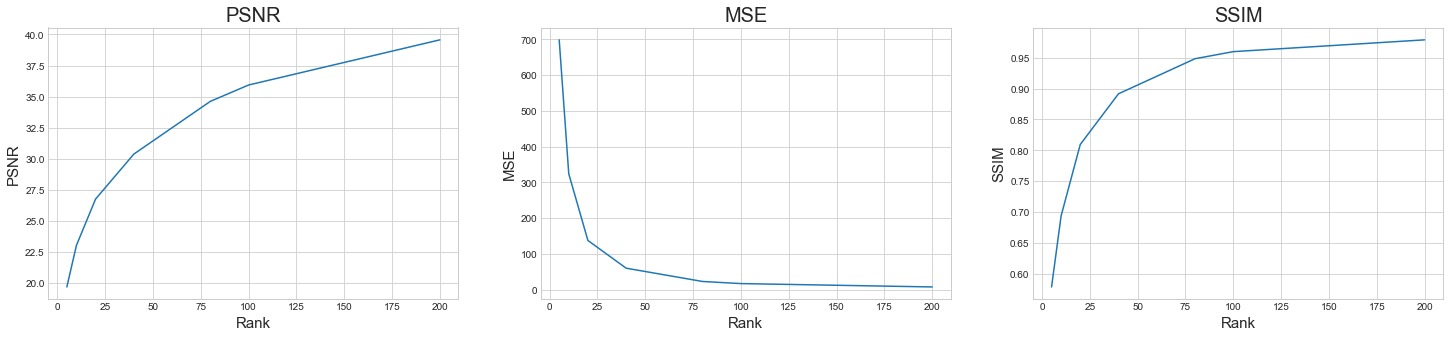

In [165]:
# image quality metrics
fig, ax = plt.subplots(1, 3, figsize=[25, 5])
ax[0].plot(ranks_to_test, psnr)
ax[0].set_title('PSNR', fontsize=20)
ax[0].set_xlabel('Rank', fontsize=15)
ax[0].set_ylabel('PSNR', fontsize=15)
ax[1].plot(ranks_to_test, mse)
ax[1].set_title('MSE', fontsize=20)
ax[1].set_xlabel('Rank', fontsize=15)
ax[1].set_ylabel('MSE', fontsize=15)
ax[2].plot(ranks_to_test, ssim)
ax[2].set_title('SSIM', fontsize=20)
ax[2].set_xlabel('Rank', fontsize=15)
ax[2].set_ylabel('SSIM', fontsize=15)
plt.show()

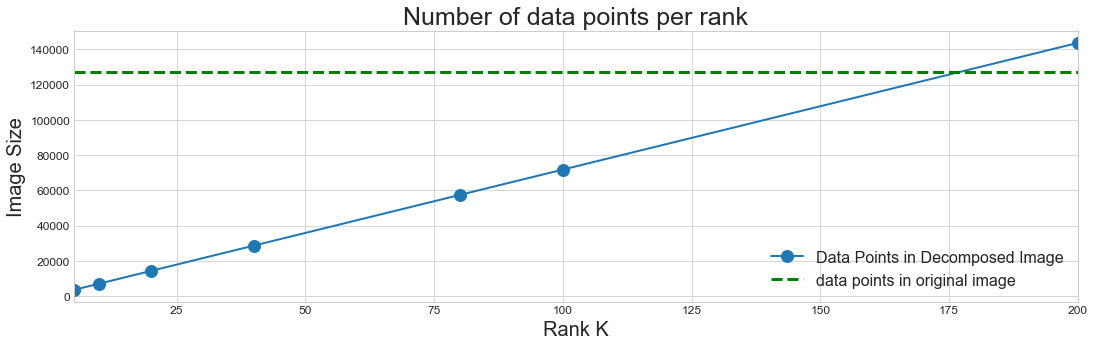

In [166]:
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

# Plot original image as reference
ax.plot(ranks_to_test, data_points, marker='o', lw=2, markersize=12, label='Data Points in Decomposed Image')
ax.plot((ranks_to_test[0], ranks_to_test[-1]),
        (data_points_original, data_points_original),
        'g--',
        lw=3,
        label='data points in original image')

#
ax.set_title('Number of data points per rank', fontsize=25)
ax.tick_params(labelsize=12)
ax.set_xlim(ranks_to_test[0], ranks_to_test[-1])
ax.set_xlabel('Rank K', fontsize=20)
ax.set_ylabel('Image Size', fontsize=20)
ax.legend(fontsize=16)

plt.show()

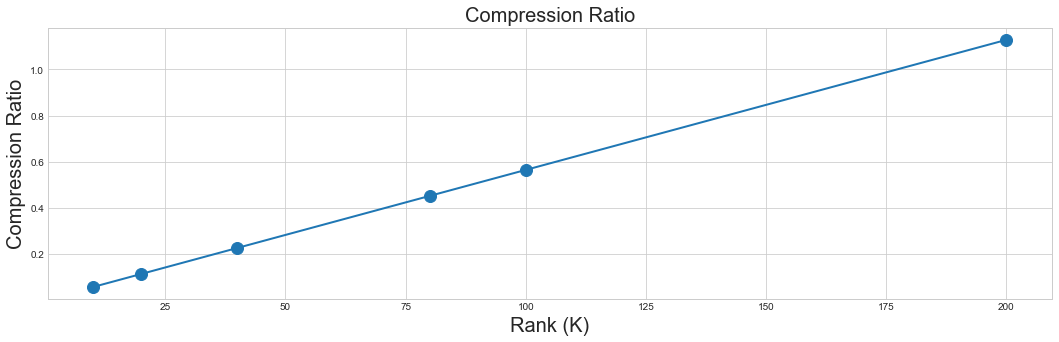

In [167]:
# compression ratio
compression_ratio = []
for i in range(1,len(ranks_to_test)):
    compression_ratio.append(data_points[i] / data_points_original)

# plot compression ratio
plt.figure(figsize=[18, 5])
plt.plot(ranks_to_test[1:], compression_ratio, marker='o', lw=2, markersize=12, label='Compression Ratio')
plt.title('Compression Ratio', fontsize=20)
plt.xlabel('Rank (K)', fontsize=20)
plt.ylabel('Compression Ratio', fontsize=20)
plt.show()

## Conclusion
- As we keep increasing the rank of the matrix, the quality of image increases.
- But with rank the size of image increases.
